In [1]:
%autosave 0

Autosave disabled


# suneku.classifier

In [2]:
from suneku import hello
from suneku.classifier import LogisticClassifier, traintest
hello(LogisticClassifier)

type

    Classify rows of a matrix into one of several categories.
    Return a DataFrame with category and probability for each row.

    Initialize using training data with known categories.
    Call with new data to classify each row.

    Input
        data    any valid DataFrame input: Training data.
        target  string or int: Name of column with known classes.
        **kwargs are passed to scikit-learn model.
    


## demo

In [3]:
demo = LogisticClassifier.demo()
print(demo)

LogisticClassifier
target  : species
samples : 150
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


In [4]:
demo.data.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## partition rows into training and testing

In [5]:
traindata,testdata = traintest(demo.data,0.33)
traindata.sample(5)

Train with 49 of 150 rows


,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
136,virginica,6.3,3.4,5.6,2.4
85,versicolor,6.0,3.4,4.5,1.6
44,setosa,5.1,3.8,1.9,0.4
147,virginica,6.5,3.0,5.2,2.0
78,versicolor,6.0,2.9,4.5,1.5


## build a LogisticClassifier
Pre-processing and learning are automatic.

In [6]:
params = {'penalty':'l1','solver':'liblinear'}
classifier = LogisticClassifier(traindata,'species',**params)
print(classifier)

LogisticClassifier
target  : species
samples : 49
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


## inspect data

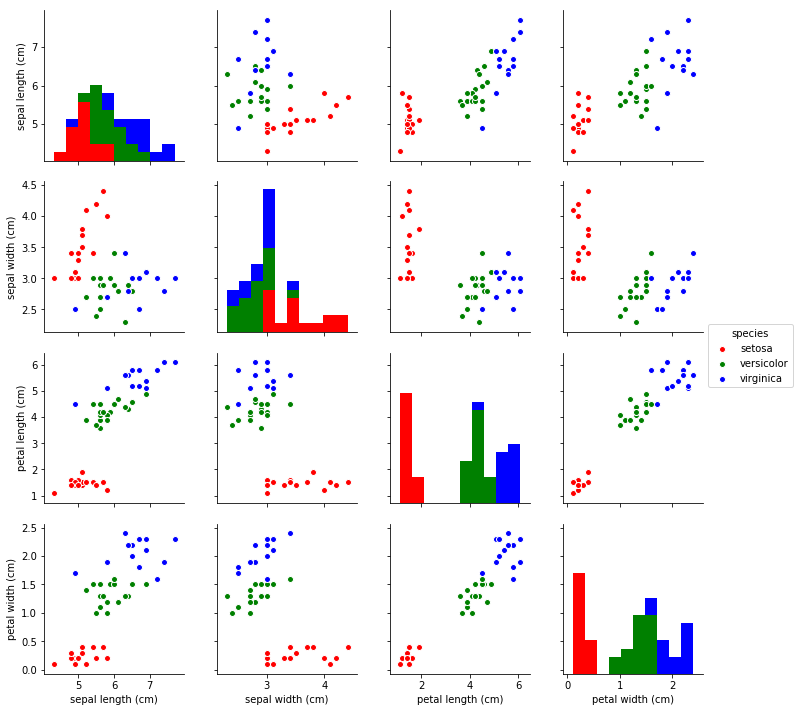

In [7]:
pairgrid = classifier.show(palette=list('rgb'))

## inspect model

In [8]:
print(classifier.model)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)


In [9]:
classifier.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.081104,0.588391,-1.321844,-0.593826
versicolor,0.000000,-0.719972,0.000000,0.000000
virginica,0.000000,0.000000,0.049028,2.188634


## classify things

In [10]:
classifier(testdata).sample(5)

,class,p_class
50,versicolor,0.393360
40,setosa,0.776792
124,virginica,0.657519
137,virginica,0.549908
92,versicolor,0.616809


In [11]:
classifier.probs(testdata).sample(5)

,setosa,versicolor,virginica
19,0.845497,0.126876,0.027627
107,0.030027,0.440845,0.529128
140,0.041064,0.305690,0.653246
138,0.103470,0.387476,0.509054
134,0.047005,0.614869,0.338126


## test with known classes

In [12]:
print('Top 5 worst predictions:')
classifier.test(testdata).nlargest(5,'surprise')

Top 5 worst predictions:
89.1% correct

class       setosa  versicolor  virginica
species                                  
setosa          33           1          0
versicolor       0          26          5
virginica        0           5         31



,class,correct,p_class,reality,surprise
119,versicolor,False,0.640828,virginica,1.477254
134,versicolor,False,0.614869,virginica,1.376579
50,versicolor,True,0.393360,versicolor,1.346078
65,versicolor,True,0.419428,versicolor,1.253505
41,versicolor,False,0.545030,setosa,1.136157


## try again with new parameters

In [13]:
params = dict()
params['multi_class'] = 'multinomial'
params['penalty'] = 'l2'
params['solver'] = 'lbfgs'

classifier.learn(**params)
classifier.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-4.031691,4.490522,-10.275315,-9.628676
versicolor,3.503558,-0.021369,-7.366442,-4.211967
virginica,0.528133,-4.469153,17.641757,13.840643


In [14]:
print('Top 5 worst predictions:')
classifier.test(testdata).nlargest(5,'surprise')

Top 5 worst predictions:
97.0% correct

class       setosa  versicolor  virginica
species                                  
setosa          34           0          0
versicolor       0          28          3
virginica        0           0         36



,class,correct,p_class,reality,surprise
83,virginica,False,0.993613,versicolor,7.290604
72,virginica,False,0.846182,versicolor,2.700699
68,virginica,False,0.641665,versicolor,1.480618
133,virginica,True,0.634181,virginica,0.657034
77,versicolor,True,0.662168,versicolor,0.594732
